In [1]:
from utils import fetch
from Classifier import RBM_LR, PCA_LR

In [2]:
def hyperparameter_tuning(Clf, X_train, y_train, **params):
    # Search best parameters
    print(
        Clf.grid_search(
            X_train,
            y_train,
            **params
        )
    )

In [3]:
def build_model(Clf, X_train, X_test, y_train, y_test):
    # Fit classifier
    Clf.model.fit(X_train, y_train)
    # Predict labels
    y_pred = Clf.model.predict(X_test)

    # Make classification report
    Clf.report(X_test, y_test)
    Clf.plot_heatmap(X_test, y_test, y_pred)
    Clf.plot_digits(
        X_test, labels=y_test, ticks=(3, 10), labels_pred=y_pred
    )

    # Save model
    Clf.joblib()

In [4]:
X_train, X_test, y_train, y_test = fetch(10000, random_state=0)
rbm_lr = RBM_LR(random_state=0)
pca_lr = PCA_LR(random_state=0)

In [7]:
hyperparameter_tuning(
    rbm_lr,
    X_train, y_train,
    bernoullirbm__learning_rate=[0.1, 0.01, 0.001],
    bernoullirbm__n_iter = [20, 40, 80],
    logisticregression__C=[1, 100, 10000],
    logisticregression__max_iter=[250, 500, 1000],
)

Fitting 2 folds for each of 9 candidates, totalling 18 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:  7.6min finished
Pipeline(memory=None,
         steps=[('minmaxscaler', MinMaxScaler(copy=True, feature_range=(0, 1))),
                ('binarizer', Binarizer(copy=True, threshold=0.5)),
                ('bernoullirbm',
                 BernoulliRBM(batch_size=10, learning_rate=0.01,
                              n_components=256, n_iter=10, random_state=0,
                              verbose=0)),
                ('logisticregression',
                 LogisticRegression(C=1, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=250,
                                    multi_class='multinomial', n_jobs=None,
                                    penalty='l2', random_state=0,
           

Classification report for classifier Pipeline(memory=None,
         steps=[('minmaxscaler', MinMaxScaler(copy=True, feature_range=(0, 1))),
                ('binarizer', Binarizer(copy=True, threshold=0.5)),
                ('bernoullirbm',
                 BernoulliRBM(batch_size=10, learning_rate=0.01,
                              n_components=256, n_iter=10, random_state=0,
                              verbose=0)),
                ('logisticregression',
                 LogisticRegression(C=1, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='multinomial', n_jobs=None,
                                    penalty='l2', random_state=0,
                                    solver='newton-cg', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False):
              precis

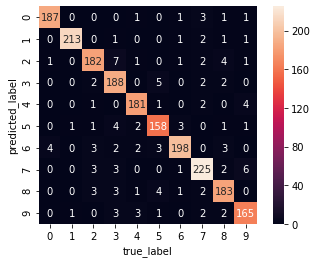

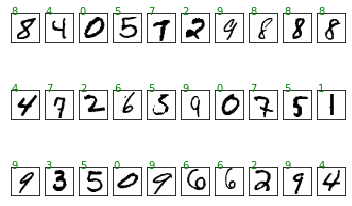

Pickled classifier at models/DigitClassifier.joblib


In [8]:
build_model(
    rbm_lr,
    X_train, X_test,
    y_train, y_test
)